# Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data_diabetes = pd.read_csv('diabetes_csv.csv')
data_diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
data_diabetes.shape


(768, 9)

In [5]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


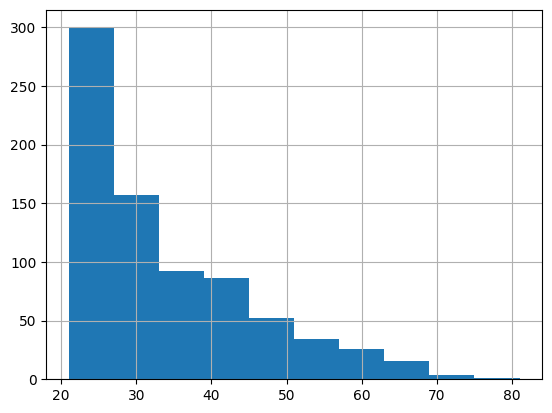

In [6]:
data_diabetes['age'].hist()
plt.show()

In [7]:
#Creating Independent Variable
X = data_diabetes.iloc[:,0:8] #Getting first 8 columns
X.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
#Creating Dependent Variable
Y = data_diabetes.iloc[:,8] #Getting last column
Y.head()

0    tested_positive
1    tested_negative
2    tested_positive
3    tested_negative
4    tested_positive
Name: class, dtype: object

In [9]:
#Divide data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20)
#test_size=.20 specifies 20% of data is used for test and remaining used for train

In [10]:
print('Size of X_train = ', X_train.shape)
print('Size of X_test = ', X_test.shape)
print('Size of Y_train = ', Y_train.shape)
print('Size of Y_test = ',Y_test.shape)

Size of X_train =  (614, 8)
Size of X_test =  (154, 8)
Size of Y_train =  (614,)
Size of Y_test =  (154,)


In [11]:
#Importing LR model
from sklearn.linear_model import LogisticRegression

#Training the model
LRClassifier = LogisticRegression()
LRClassifier.fit(X_train, Y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
#Testing the model
prediction = LRClassifier.predict(X_test)
print(prediction)
#It will predict the dependent variable coresponding to X_test

['tested_negative' 'tested_negative' 'tested_positive' 'tested_negative'
 'tested_positive' 'tested_negative' 'tested_negative' 'tested_negative'
 'tested_negative' 'tested_negative' 'tested_positive' 'tested_positive'
 'tested_negative' 'tested_negative' 'tested_negative' 'tested_negative'
 'tested_negative' 'tested_positive' 'tested_negative' 'tested_negative'
 'tested_negative' 'tested_negative' 'tested_negative' 'tested_positive'
 'tested_negative' 'tested_negative' 'tested_positive' 'tested_negative'
 'tested_negative' 'tested_negative' 'tested_negative' 'tested_negative'
 'tested_negative' 'tested_positive' 'tested_negative' 'tested_negative'
 'tested_negative' 'tested_positive' 'tested_positive' 'tested_negative'
 'tested_negative' 'tested_negative' 'tested_negative' 'tested_positive'
 'tested_negative' 'tested_negative' 'tested_positive' 'tested_negative'
 'tested_positive' 'tested_negative' 'tested_positive' 'tested_negative'
 'tested_negative' 'tested_negative' 'tested_negati

In [13]:
#Compare the predicted output with actual output i.e Y_test
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

                 precision    recall  f1-score   support

tested_negative       0.81      0.92      0.86       100
tested_positive       0.80      0.61      0.69        54

       accuracy                           0.81       154
      macro avg       0.81      0.77      0.78       154
   weighted avg       0.81      0.81      0.80       154



In [14]:
#Only Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,prediction))

0.8116883116883117


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction)
print(cm)

[[92  8]
 [21 33]]


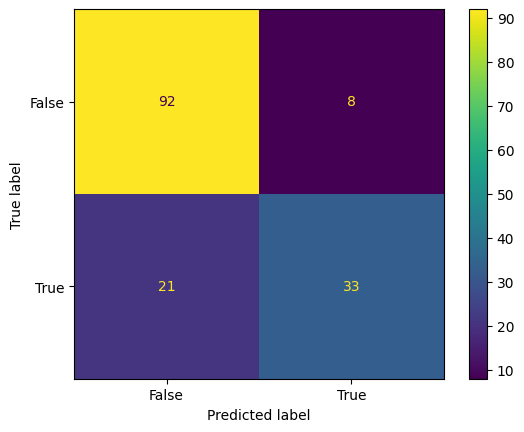

In [16]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()